In [1]:
from Detector.detector import Detector_v4, Detector_v3
from PIL import Image
import torch
from torchvision import transforms
import Detector.visualize as visualize  # TODO check imports
import re
import glob
import os
import numpy as np
import imp

In [2]:
detector = Detector_v4()

In [7]:
imp.reload(visualize)

<module 'Detector.visualize' from '/media/sil2/tal/Pogona_Pursuit/Detector/visualize.py'>

In [8]:
test_video_path = "2105.avi"
d = visualize.overlay_video(test_video_path, "labelled/2105overlaytest.mp4", detector, overlay_fn=visualize.dots_overlay)

100%|██████████| 1000/1000 [01:13<00:00, 13.57it/s]


In [14]:
test_video_path = "2805_test.avi"
d = visualize.save_pred_video(test_video_path, "labelled/2805_arrows-v4.mp4", detector,num_frames=1000,frame_rate=30, visAngle=True,dots=False)

  0%|          | 3/1000 [00:00<00:40, 24.78it/s]

saving to:  labelled/2805_arrows-v4.mp4
width: 1440, height: 1080


100%|██████████| 1000/1000 [00:26<00:00, 37.94it/s]


Read :  0.005282259225845337
Rsz_inf :  0.012632256984710693
Write :  0.007845428705215454


In [7]:
for k in d.keys():
    print(k,": ",round(1/d[k].mean()))
d['Total'] = np.sum(np.stack([d[k] for k in d.keys() if k!='Total'],axis=1),axis=1)
print("Average FPS: ",round(1/d['Total'].mean()))

Read :  186.0
Rsz_inf :  76.0
Write :  128.0
Average FPS:  38.0


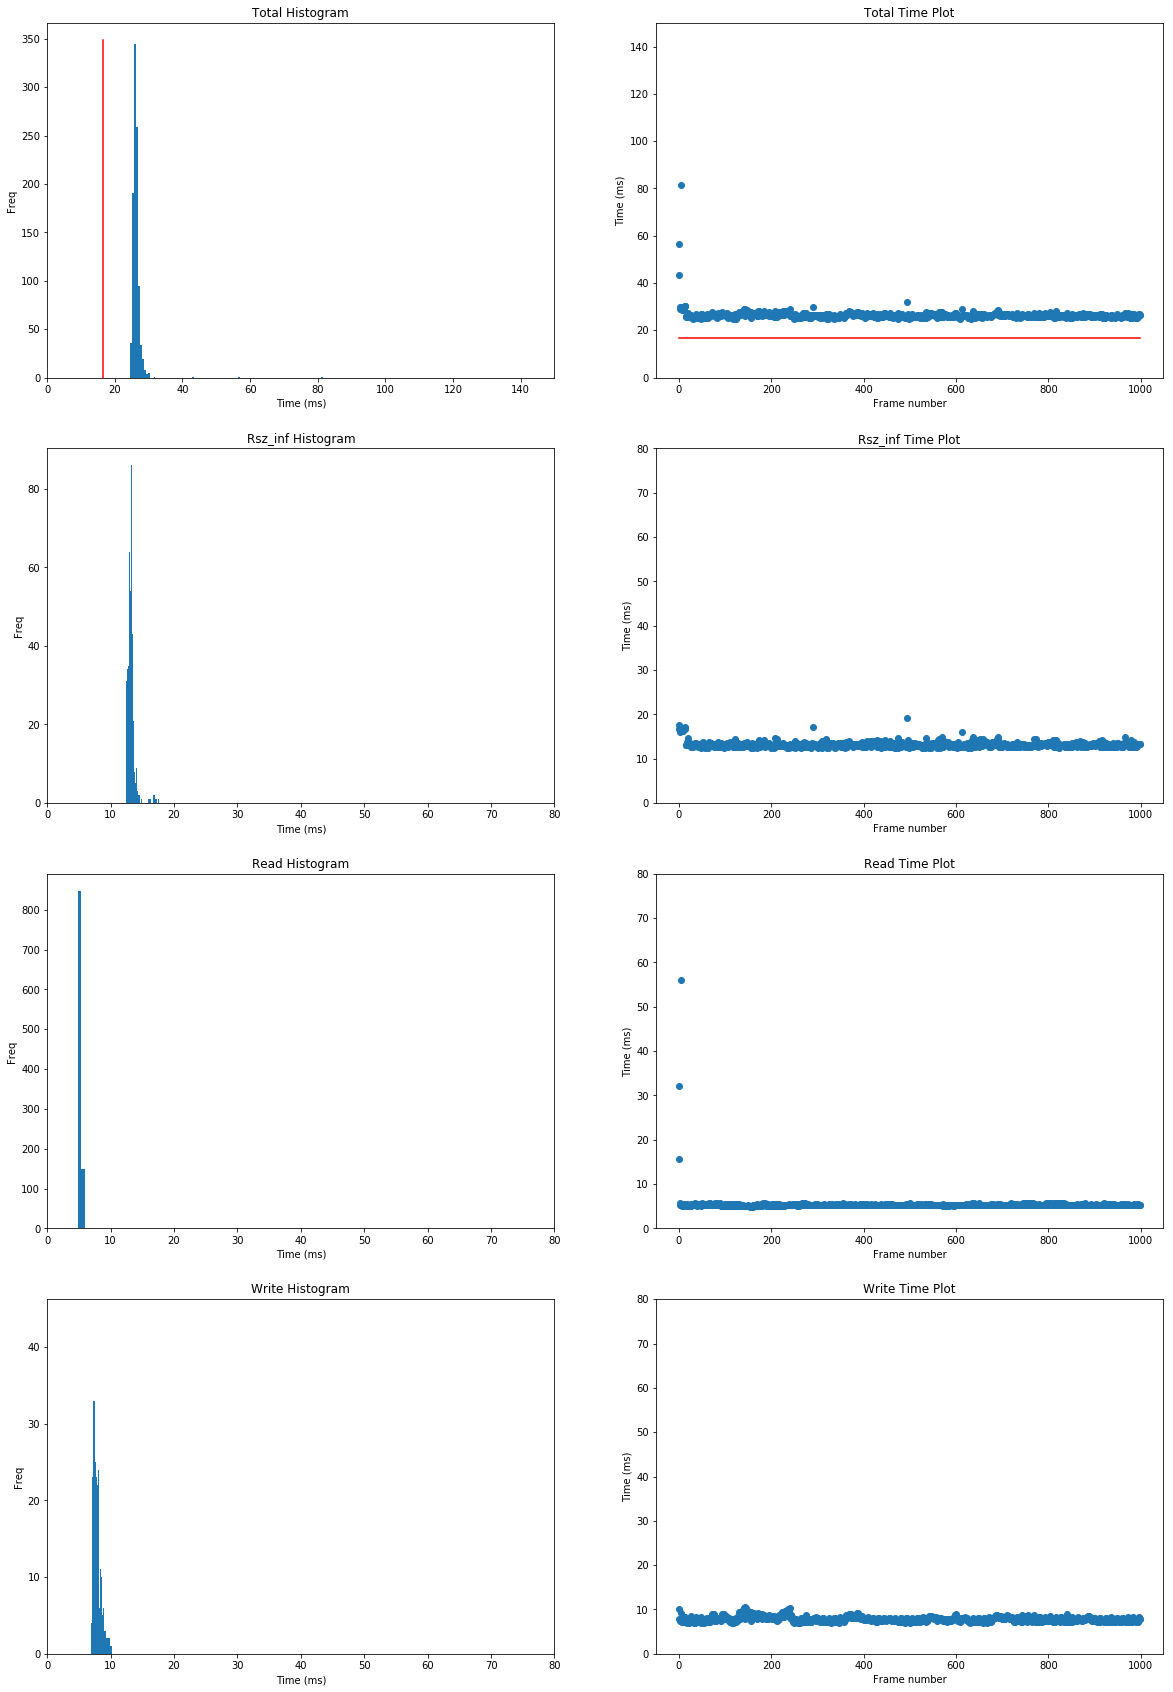

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# phases = ['Read','BGR2RGB','resize_image','Inference','Write'] # execution order
phases = ['Rsz_inf','Read','Write'] # sorted order
fig,axs = plt.subplots(len(phases)+1,2,figsize=(20,30))
k='Total'
axs[0][0].set_title(k+' Histogram')
axs[0][1].set_title(k+' Time Plot')
axs[0][0].hist(d[k]*1000,label=k,bins=100)
axs[0][0].set_xlim(0,150)
axs[0][0].set_xlabel('Time (ms)')
axs[0][1].set_xlabel('Frame number')
axs[0][0].set_ylabel('Freq')
axs[0][1].set_ylabel('Time (ms)')
axs[0][1].scatter(np.arange(d[k].shape[0]),d[k]*1000)
axs[0][1].set_ylim(0,150)
axs[0][0].plot(np.ones(350)*16.6,np.arange(350),color='r')
axs[0][1].plot(np.arange(1000),np.ones(1000)*16.6,color='r')
for i,k in enumerate(phases):
    i+=1
    axs[i][0].set_title(k+' Histogram')
    axs[i][1].set_title(k+' Time Plot')
    axs[i][0].hist(d[k]*1000,label=k,bins=100)
    axs[i][0].set_xlim(0,80)
    axs[i][0].set_xlabel('Time (ms)')
    axs[i][1].set_xlabel('Frame number')
    axs[i][0].set_ylabel('Freq')
    axs[i][1].set_ylabel('Time (ms)')
    axs[i][1].scatter(np.arange(d[k].shape[0]),d[k]*1000)
    axs[i][1].set_ylim(0,80)
#plt.savefig('timings.jpg')

In [3]:
test_video_path = "/media/sil2/regev/pose_estimation/Arena/output/20200521-195335/19506481-0000.avi"
vid_name = '19506481-0000.avi'
path_to = '/media/sil2/regev/pose_estimation/Arena/output/20200521'
L = glob.glob(path_to+'*')
video_paths = []
output_paths = []
for file in L:
    vid_time = re.search('20200521-(\d+)',file).group(1)
    p = os.path.join(path_to+'-'+vid_time,vid_name)
    if os.path.exists(p):
        video_paths.append(p)
        output_paths.append("labelled/arrow_" + vid_time + ".mp4")
        
video_paths

['/media/sil2/regev/pose_estimation/Arena/output/20200521-172245/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172519/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172637/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172842/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173206/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173410/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173606/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174011/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174247/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174430/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-175816/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-180046/

In [30]:
for i in range(len(video_paths)):
    if re.search('20200521-(\d+)',video_paths[i]).group(1)[:2]=='17':
        continue
    inf_time = visualize.save_pred_video(video_paths[i], video_paths[i], detector)
    #print("Inference framerate:", 1/inf_time)

NameError: name 'video_paths' is not defined